In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# This Python 3 environment comes with many helpful analytics libraries installed
#Import the libraries that we needed

import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

#read the dataset
df=pd.read_excel('/content/drive/MyDrive/my_projects/Appendicitis detection/app_data.xlsx')
# Displaying the first rows of the dataset
df.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


Below is a concise summary of some principal features:

Age

BMI

Sex

Height

Weight

Length of Stay : Length of the stay in the hospital

Alvarado_Score :	Patient's score according to the scoring system

Paedriatic_Appendicitis_Score : Patient's score according to the scoring system

Appendix_on_US : Detectability of the vermiform appendix during sonographic examination

Appendix_Diameter : Maximal outer diameter of the appendix

Migratory_Pain  : Abdominal pain; usually starts in epigastrium and moves to the right lower quadrant

Lower_Right_Abd_Pain : Right iliac fossa pain detected on palpation

Contralateral_Rebound_Tenderness : A state in which pain of the contralateral side (usually, the right lower quadrant) is felt on the release of pressure (usually, in the left lower quadrant) over the abdomen

Coughing_Pain : Abdominal pain by forced cough

Nausea : Feeling of sickness/ejection of contents from stomach through the mouth

Loss_of_Appetite

Body_Temperature : Measured by a thermometer placed in the rectum or in the auditory canal

WBC_Count : The number of leucocytes in a unit volume of blood; inflammation parameter

Neutrophil_Percentage : Mature WBC in the granulocytic series

Segmented_Neutrophils : Most mature neutrophilic granulocytes present in circulating blood, increased during an inflammatory disorder

Neutrophilia : Relative neutrophilic leucocytosis, often a result of a bacterial infection

RBC_Count : The number of erythrocytes in a unit volume of blood

Hemoglobin : Hemoglobin level; a red protein in the red blood cells that contains iron and is responsible for transporting oxygen

RDW  : A blood test that measures the differences in the volume and size of the erythrocytes

Thrombocyte_Count : The number of platelets in a unit volume of blood

Ketones_in_Urine : 	Presence of ketone bodies in urine, e.g. in case of anorexia

RBC_in_Urine : Blood in urine

WBC_in_Urine : Leucocytes in urine, e.g., in case of infection

CRP : 	Protein produced by the liver, elevated in case of inflammation, infection, or injury

Dysuria : Pain or other difficulty during urination

Stool : Characteristics of bowel movements

Peritonitis : Spasm of abdominal wall muscles detected on palpation, usually a result of inflammation

Psoas_Sign : Abdominal pain produced by extension of the hip

Ipsilateral_Rebound_Tenderness : A state in which pain of the ipsilateral side is felt on the release of pressure over the abdomen

US_Performed  : If an abdominal ultrasonography was performed or not

Free_Fluids : 	Free fluids inside the abdomen

Appendix_Wall_Layers: 	Distribution and characteristics of appendix layers, e.g., irregular in case of an increasing inflammation

Target_Sign : Axial image of appendix with a fluid-filled center surrounded by echogenic mucosa and submucosa and hypoechoic muscularis

Appendicolith : Presence of fecalith in the appendix, e.g. acoustic shadow

Perfusion : Blood flow to the appendix wall

Perforation : Signs of appendix perforation in US

Surrounding_Tissue_Reaction  : Inflammation signs in tissue (i.a. in omentum/fat tissue) surrounding appendix

Appendicular_Abscess : Appendiceal mass

Abscess_Location : Location of the abcess intraperitoneal

Pathological_Lymph_Nodes : 	Enlarged and inflamed intra-abdominal lymph nodes

Lymph_Nodes_Location : The location of pathological lymph nodes in the abdomen

Bowel_Wall_Thickening : Edema of the intestinal wall, > 2-3 mm for small bowel wall thickening

Conglomerate_of_Bowel_Loops : Small intestine conglomerate as sign of intraperitoneal inflammation

Ileus : 	Sonographic signs of paralytic ileus (e.g., dilated intestinal loops, pendulum peristalsis or absence of peristalsis)

Coprostasis : 	Fecal impaction in the colon

Meteorism : Accumulation of gas in the intestine

Enteritis : 	Sonographic features of gastroenteritis, e.g. wall thickening of ileum, increased peristalsis

Gynecological_Findings  : Gynaecological abnormalities, e.g. cysts, ovarial torsion


Displaying the shape of the dataset

In [ ]:
df.shape

(782, 58)

This feature dataset has 782 rows and 58 columns

Displaying the datatypes

In [ ]:
df.dtypes

,0
Age,float64
BMI,float64
Sex,object
Height,float64
Weight,float64
Length_of_Stay,float64
Management,object
Severity,object
Diagnosis_Presumptive,object
Diagnosis,object


In [ ]:
df.dtypes.value_counts()

,count
object,40
float64,18


The dataset contains 40 columns of object type and 18 columns of float64 type.

**DATA PREPROCESSING**

Checking the null values in the dataset

In [ ]:
df.isna().sum()

,0
Age,1
BMI,27
Sex,2
Height,26
Weight,3
Length_of_Stay,4
Management,1
Severity,1
Diagnosis_Presumptive,2
Diagnosis,2


Strategies for Handling Missing Values

Imputation:
* For features with a small percentage of missing values (e.g., Age, Sex, Weight), consider imputing the missing values.
* Use the mean, median, or mode to fill in missing numerical values.
* For categorical variables, impute with the most frequent category.

Dropping Features:
* Features with a large number of missing values (e.g., Segmented_Neutrophils, Appendicolith, Perfusion) may be dropped.

Drop the columns with highest number of missing values

In [ ]:
df.drop(['Segmented_Neutrophils','Perfusion','Perforation','Abscess_Location','Conglomerate_of_Bowel_Loops','Ileus','Coprostasis','Enteritis','Gynecological_Findings'],inplace= True,axis=1)

 Dropped the columns Segmented Neutrophils, Appendicolith, Perfusion, Perforation, Abscess Location, Conglomerate of Bowel Loops, Ileus, Coprostasis, Enteritis and Gynecological Findings

In [ ]:
df.dropna(subset=['Diagnosis'], inplace=True)

Extracting numerical columns from the dataset

In [ ]:
numerical_columns=df.select_dtypes(include=['float64']).columns

Extracting categorical columns in the dataset

In [ ]:
categorical_columns=df.select_dtypes(include=['object']).columns

Imputation Using Pandas’ Fillna Method: This is a simple method where you can fill missing values with a specific value or a statistic like mean, median, or mode.

In [ ]:
# For numerical columns
for i in numerical_columns:
  df[i].fillna(df[i].mean(), inplace=True)

In [ ]:
# For categorical columns
for j in categorical_columns:
  df[j].fillna(df[j].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

,0
Age,0
BMI,0
Sex,0
Height,0
Weight,0
Length_of_Stay,0
Management,0
Severity,0
Diagnosis_Presumptive,0
Diagnosis,0


The management of missing value has been completed. This dataset has no null values.

EDA (Explanatory Data Analysis)

In [ ]:
#Imports the libraries used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

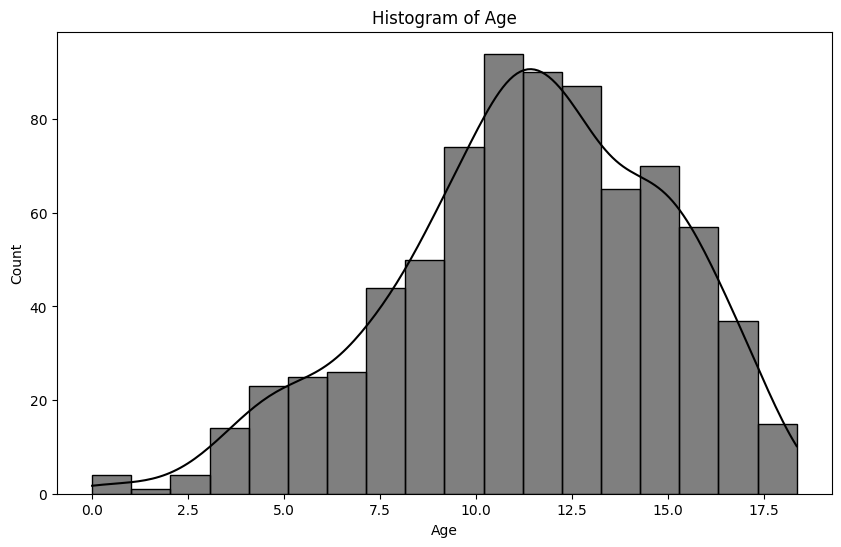

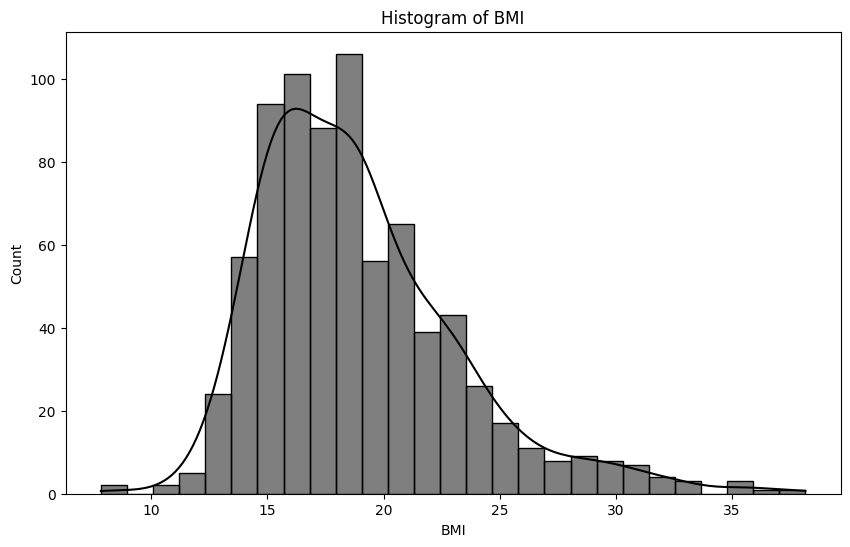

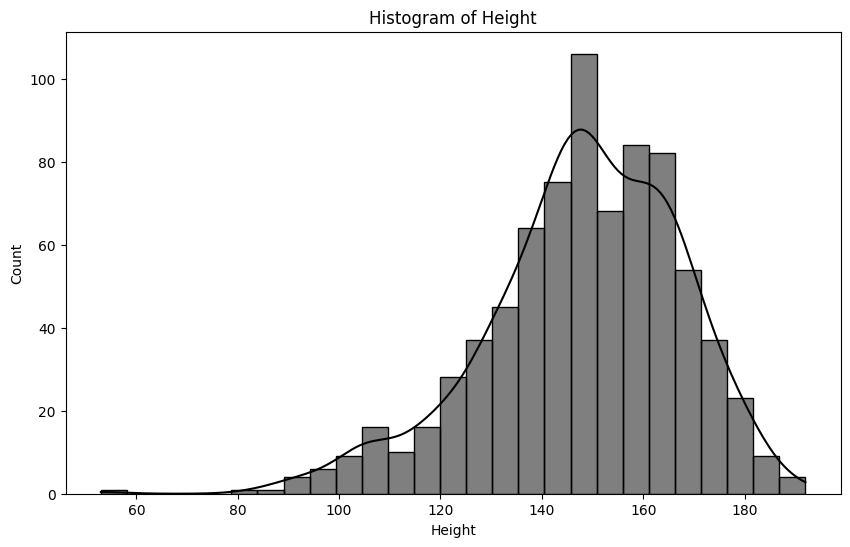

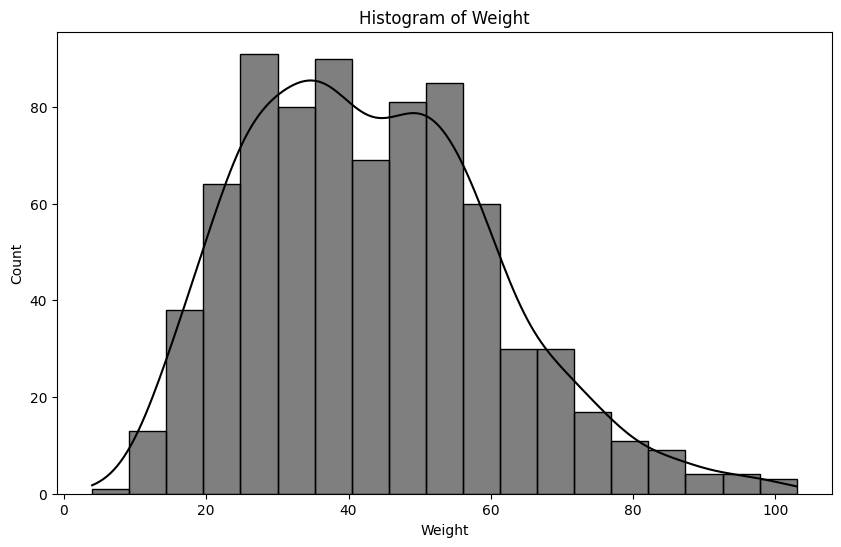

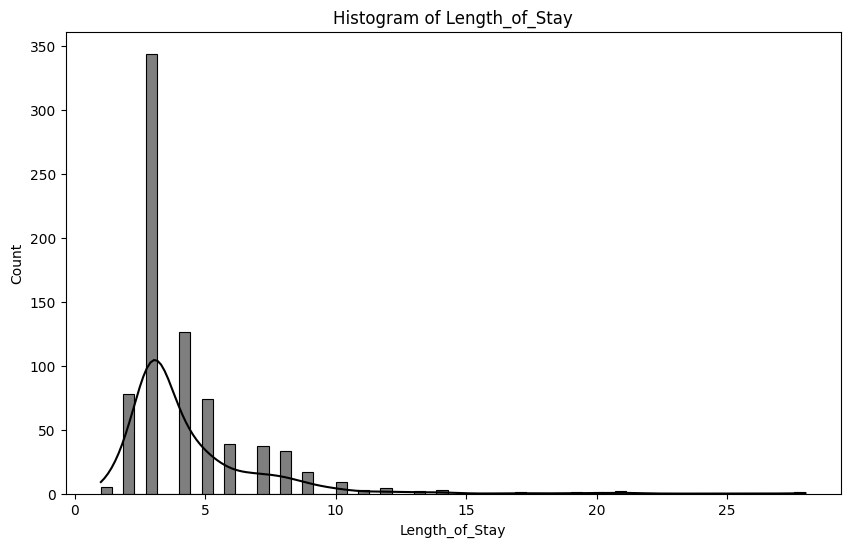

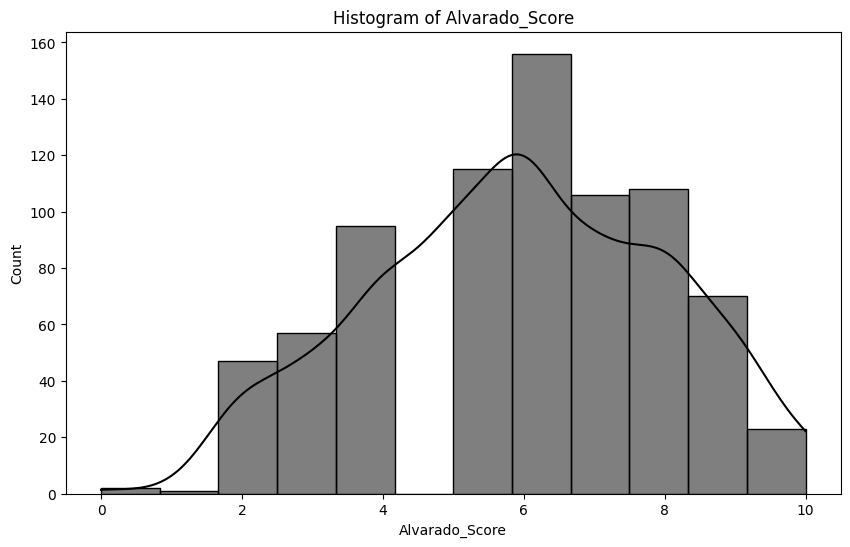

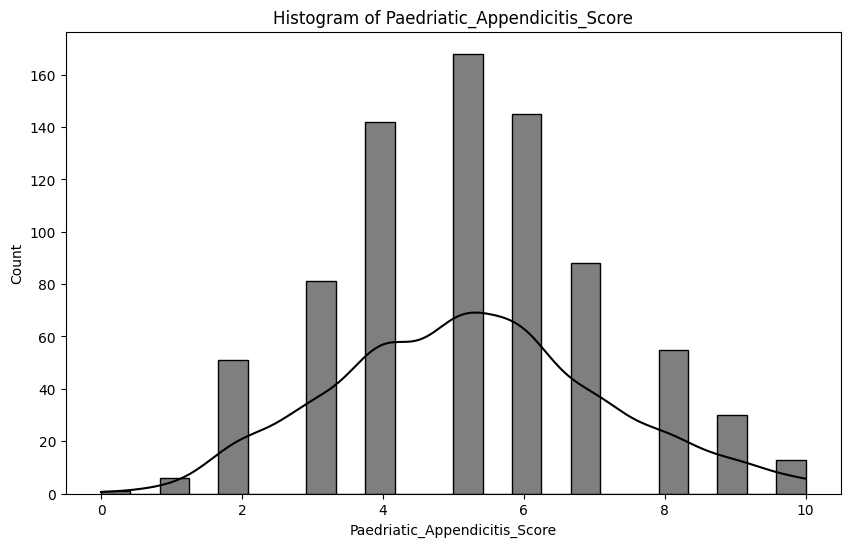

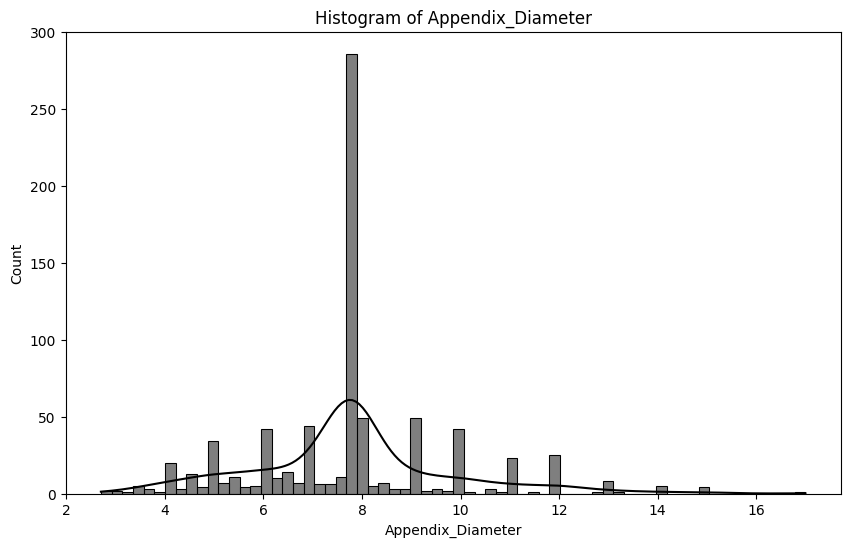

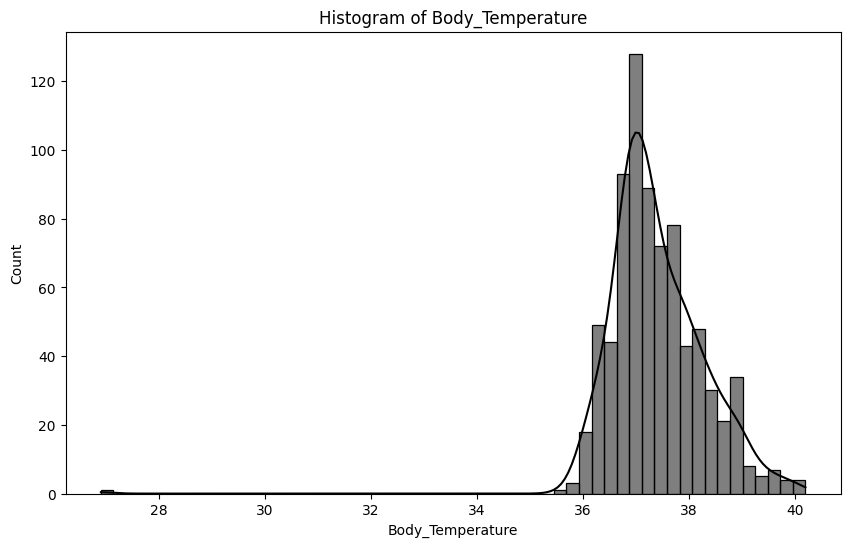

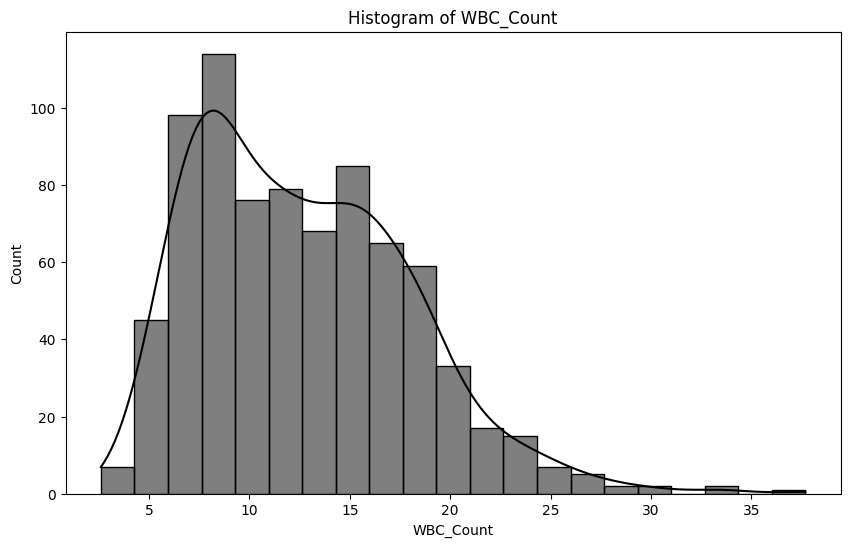

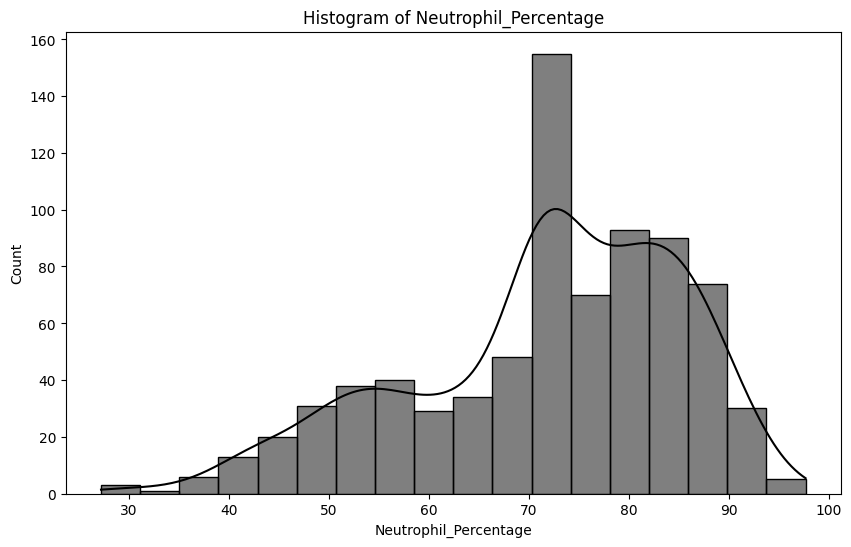

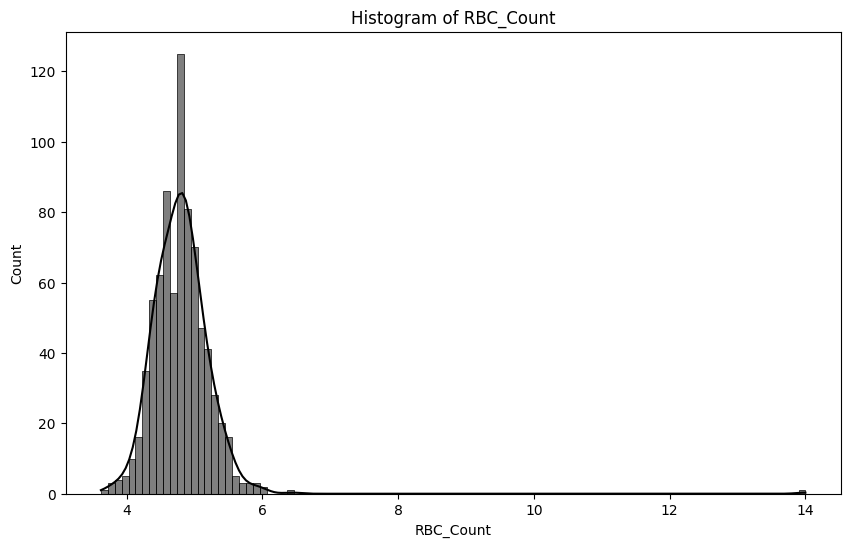

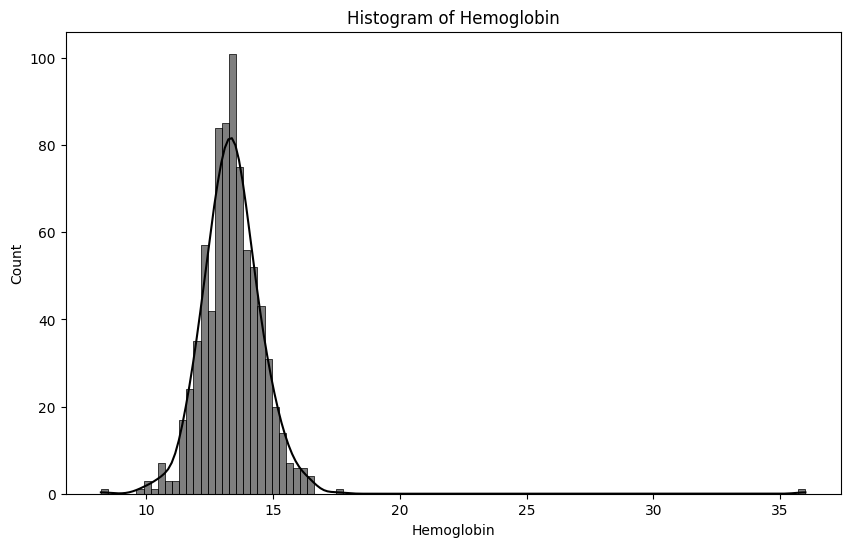

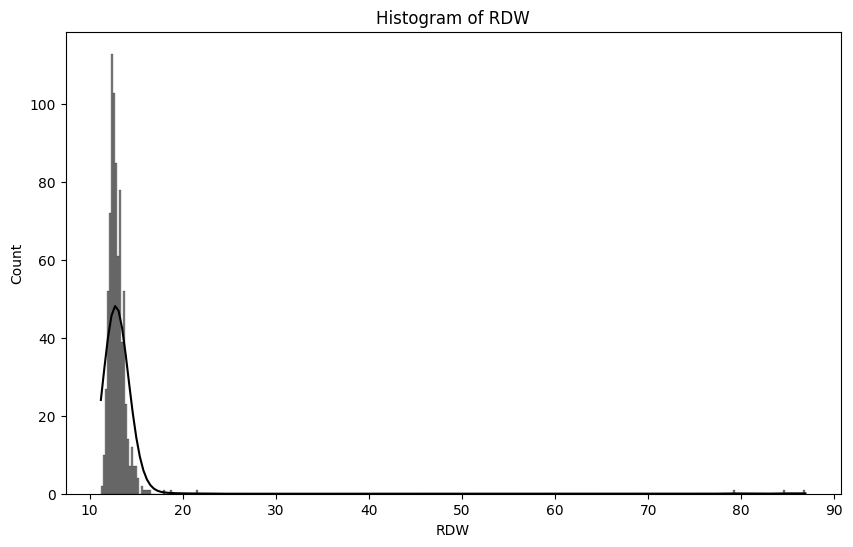

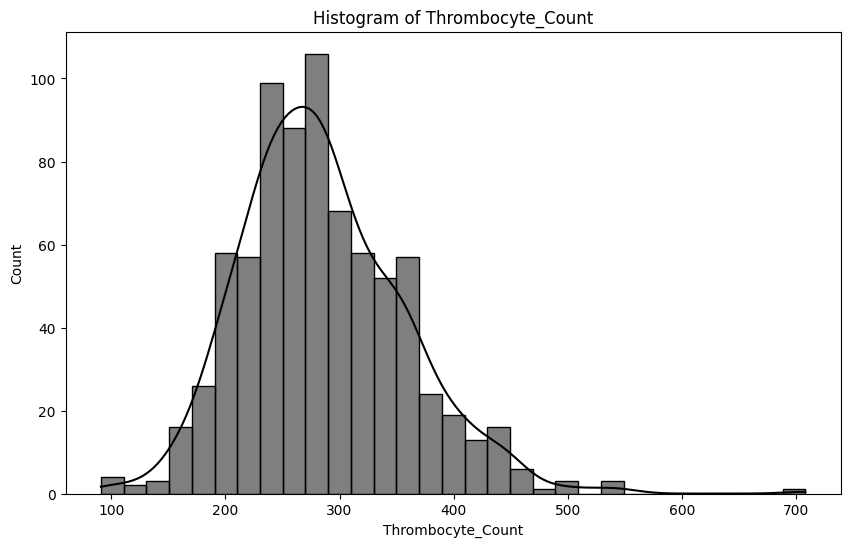

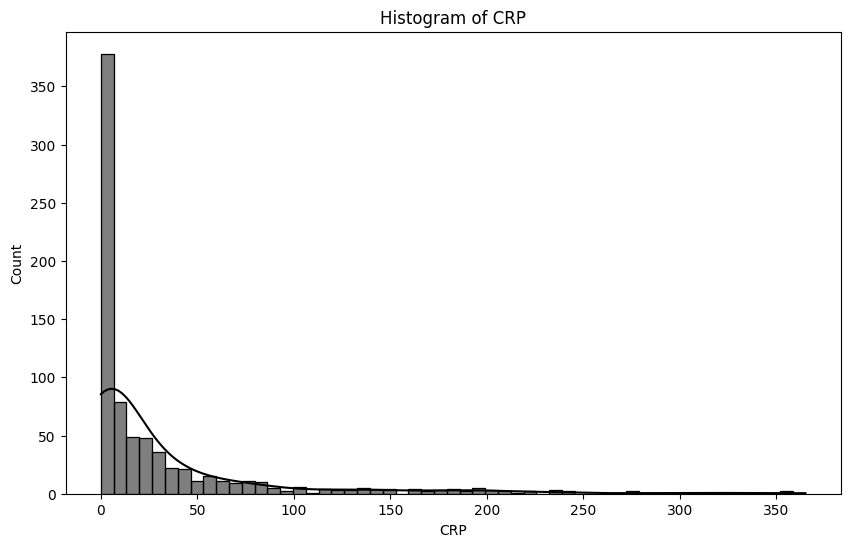

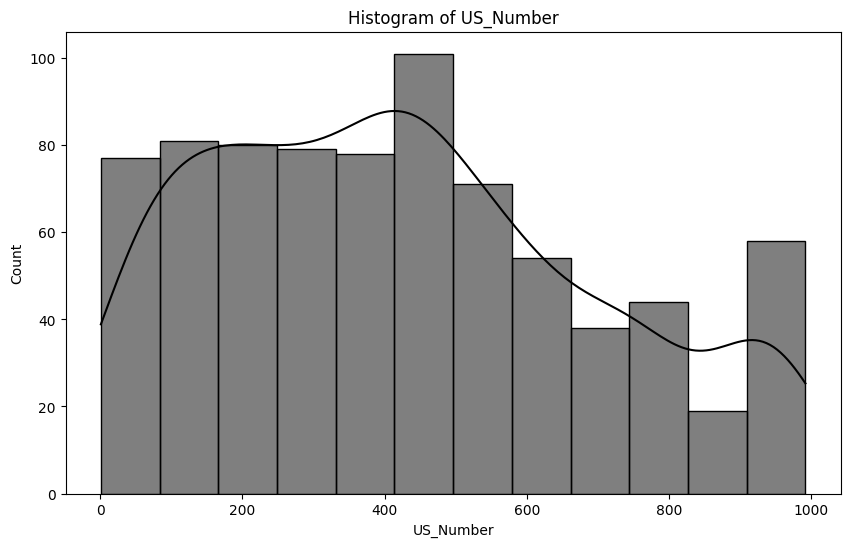

In [ ]:
# Histograms for numerical columns

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True,color = 'black')
    plt.title(f'Histogram of {col}')
    plt.show()

In [ ]:
for column in categorical_columns:
    values = df[column].value_counts()
    data = pd.DataFrame(values)
    print('columns:', column)
    print()
    print(data)

columns: Sex

        count
Sex          
male      404
female    376
columns: Management

                           count
Management                      
conservative                 483
primary surgical             270
secondary surgical            26
simultaneous appendectomy      1
columns: Severity

               count
Severity            
uncomplicated    661
complicated      119
columns: Diagnosis_Presumptive

                                                    count
Diagnosis_Presumptive                                    
appendicitis                                          683
no appendicitis                                        78
Gastroenteritis                                         3
chronische Appendizitis                                 3
chronische Bauchschmerzen                               2
Appendizitis, Lymphadenitis mesenterialis               1
Appendizitis/ Lymphadenitis mesenterialis               1
Ovarialtorsion                                        

The analysis of categorical columns

Distribution of Sex in the dataset

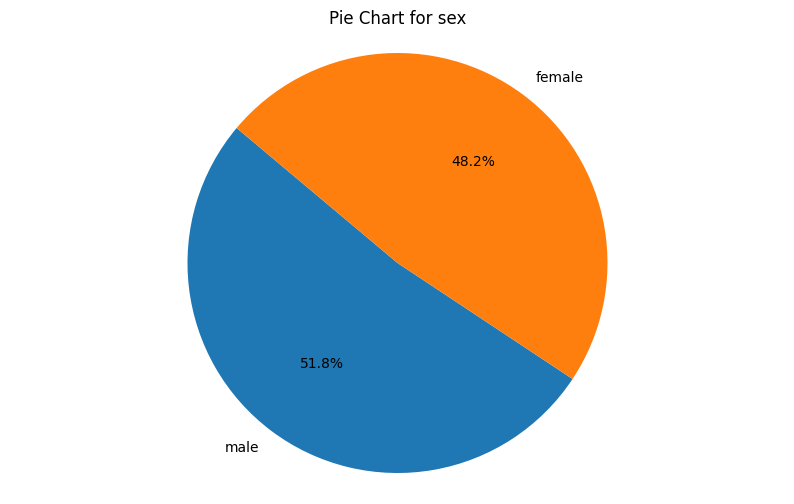

In [ ]:
counts = df['Sex'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Pie Chart for sex' )
plt.show()

The pie chart represent that patients are 51.8 % are males and rest 48.2 % are females.

Distribution of Diagnosis

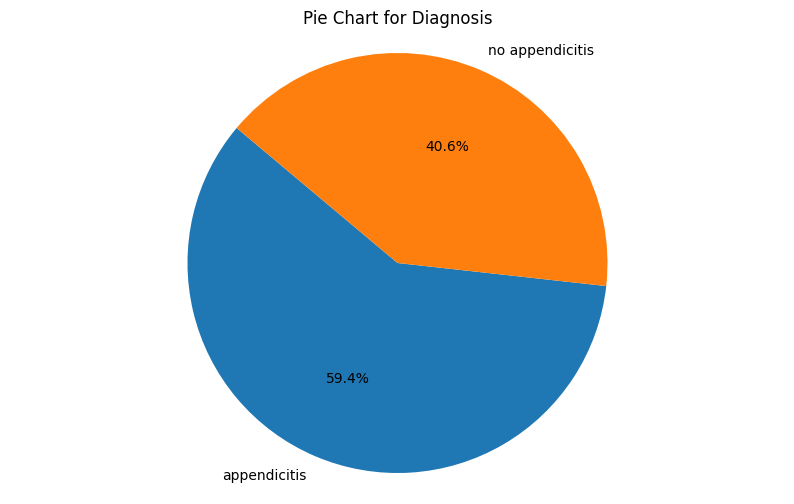

In [ ]:
counts = df['Diagnosis'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Pie Chart for Diagnosis' )
plt.show()

The pie chart displays a 59.4% prevalence of appendicitis, contrasting with 40.6% without, in a medical dataset.

Pie chart for Severity

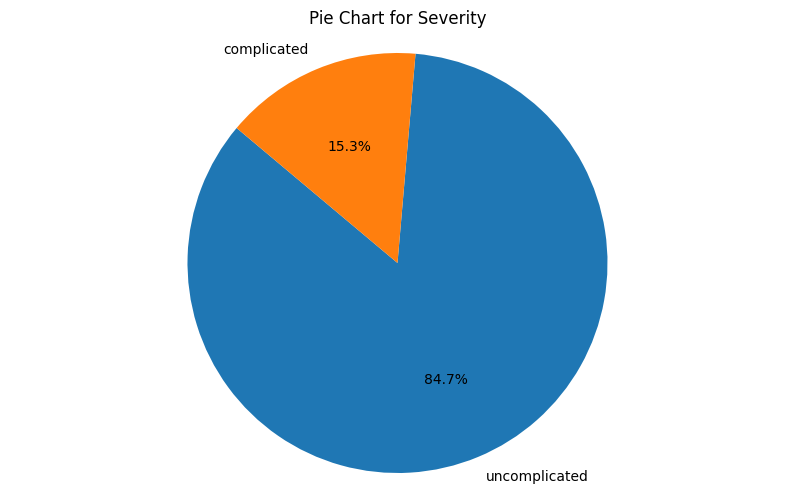

In [ ]:
counts = df['Severity'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Pie Chart for Severity')
plt.show()

The pie chart illustrates the severity of appendicitis cases. Complicated cases account for 15.3%, while uncomplicated cases make up 84.7%

Pie chart for Appendix in US

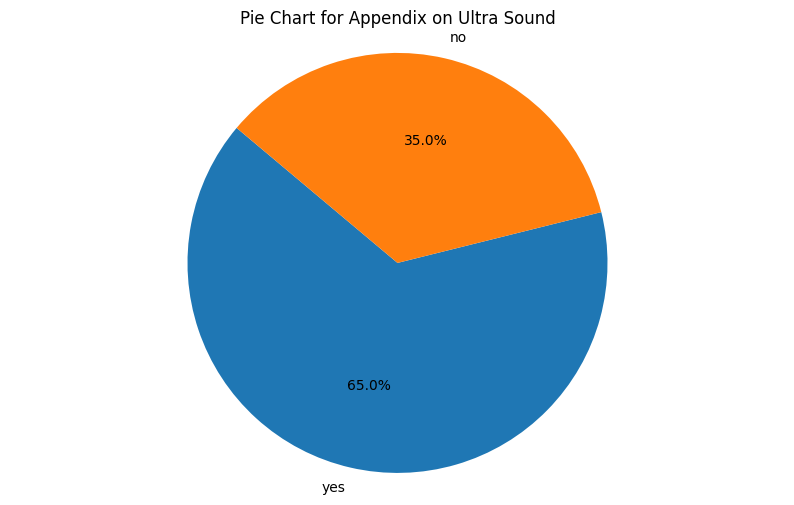

In [ ]:
counts = df['Appendix_on_US'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Pie Chart for Appendix on Ultra Sound')
plt.show()

Pie chart for appendicular abscess

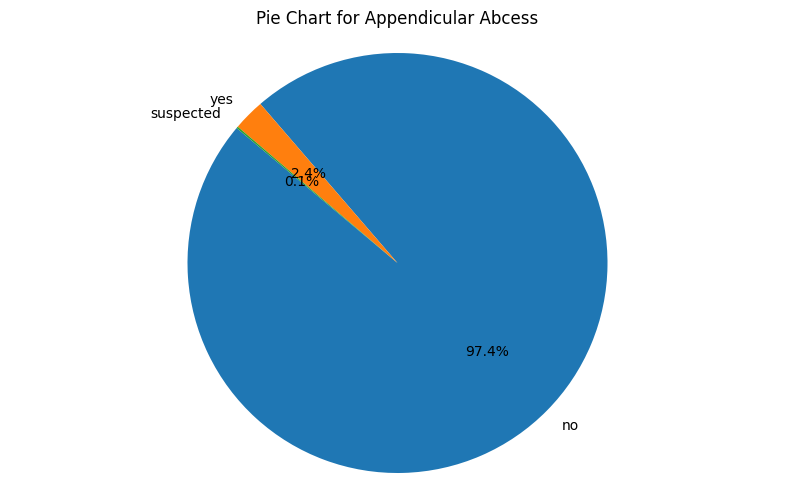

In [ ]:
counts = df['Appendicular_Abscess'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Pie Chart for Appendicular Abcess' )
plt.show()

Age distribution with respect to Diagnosis and Severity

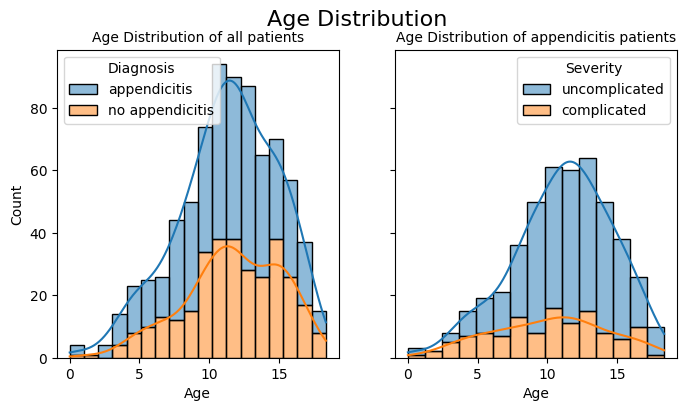

In [ ]:
fig, axes = plt.subplots(figsize=(8, 4), nrows=1, ncols=2, sharey=True)
sns.histplot(data=df, x='Age', hue='Diagnosis', kde=True, ax=axes[0], multiple='stack')
sns.histplot(data=df.loc[df.Diagnosis=='appendicitis', :], x='Age', hue='Severity', kde=True, ax=axes[1], multiple='stack')
axes[0].set_title('Age Distribution of all patients', fontsize=10)
axes[1].set_title('Age Distribution of appendicitis patients', fontsize=10)
fig.suptitle('Age Distribution', fontsize=16)
plt.show()

We observe that 10-12 year olds constitute the largest age group of people in the dataset and while most of them are diagnosed with appendicitis, majority of cases are not complicated.

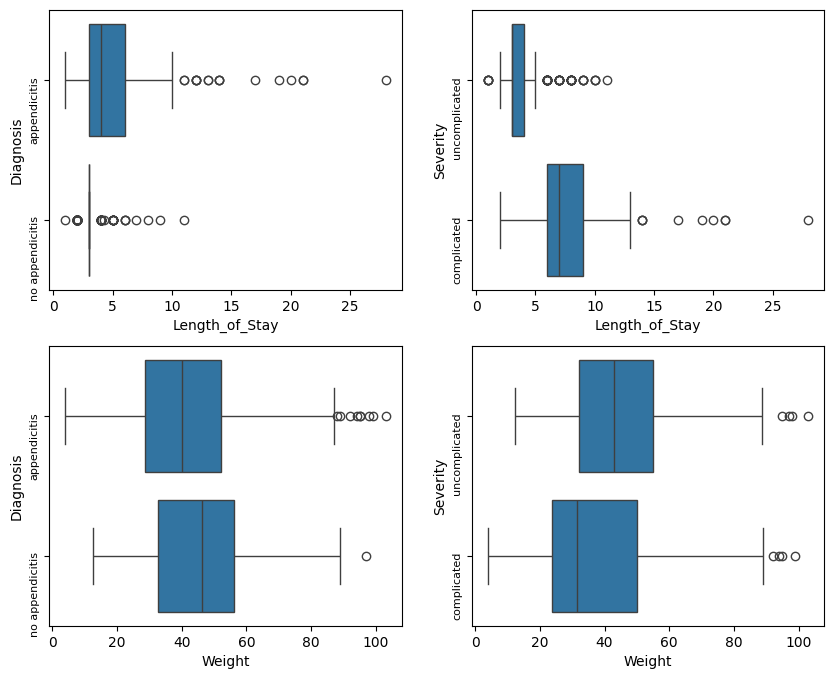

In [ ]:
fig, axes = plt.subplots(figsize=(10, 8), nrows=2, ncols=2)
diagnosis = ['appendicitis', 'no appendicitis']
severity = ['uncomplicated', 'complicated']

sns.boxplot(x='Length_of_Stay', y='Diagnosis', data=df, ax=axes[0][0])
axes[0][0].set_yticklabels(diagnosis, rotation=90, fontsize=8)
sns.boxplot(x='Length_of_Stay', y='Severity', data=df, ax=axes[0][1])
axes[0][1].set_yticklabels(severity, rotation=90, fontsize=8)
sns.boxplot(x='Weight', y='Diagnosis', data=df, ax=axes[1][0])
axes[1][0].set_yticklabels(diagnosis, rotation=90, fontsize=8)
sns.boxplot(x='Weight', y='Severity', data=df, ax=axes[1][1])
axes[1][1].set_yticklabels(severity, rotation=90, fontsize=8)

plt.show()

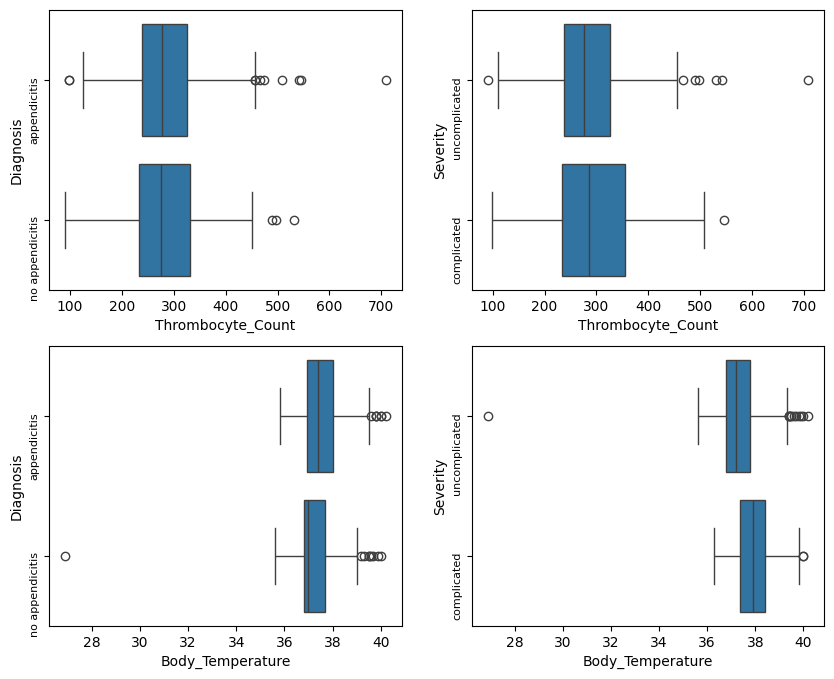

In [ ]:
fig, axes = plt.subplots(figsize=(10, 8), nrows=2, ncols=2)
diagnosis = ['appendicitis', 'no appendicitis']
severity = ['uncomplicated', 'complicated']

sns.boxplot(x='Thrombocyte_Count', y='Diagnosis', data=df, ax=axes[0][0])
axes[0][0].set_yticklabels(diagnosis, rotation=90, fontsize=8)
sns.boxplot(x='Thrombocyte_Count', y='Severity', data=df, ax=axes[0][1])
axes[0][1].set_yticklabels(severity, rotation=90, fontsize=8)
sns.boxplot(x='Body_Temperature', y='Diagnosis', data=df, ax=axes[1][0])
axes[1][0].set_yticklabels(diagnosis, rotation=90, fontsize=8)
sns.boxplot(x='Body_Temperature', y='Severity', data=df, ax=axes[1][1])
axes[1][1].set_yticklabels(severity, rotation=90, fontsize=8)

plt.show()

Considering some of the numerical columns that showed high standard variations and significantly high maximum, we observe that the columns have outliers and are right-skewed.

Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for k in categorical_columns:
  df[k]=lab.fit_transform(df[k])

In [ ]:
x = df.drop('Diagnosis', axis=1).values
y = df['Diagnosis'].values

SMOTE (Synthetic Minority Oversampling Technique) is an oversampling method used to balance class distribution in imbalanced datasets.

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and transform your data
x_resampled, y_resampled = smote.fit_resample(x, y)


In [ ]:
# training and testing of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled, y_resampled,test_size=.30,random_state=42)

In [ ]:
#normalisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

**MODEL TRAINING**

**RANDOM FOREST ALGORITHM**

Random Forest Classification with default values

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
rf = RandomForestClassifier(random_state=0, n_estimators=50, max_depth=5, criterion='gini')
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('confusion matrix for optimised random forest classification',confusion_matrix(y_test,y_pred))
print('accuracy score for optimised random forest classification',accuracy_score(y_test,y_pred))
print(classification_report(y_pred,y_test))

confusion matrix for optimised random forest classification [[119  14]
 [  8 137]]
accuracy score for optimised random forest classification 0.920863309352518
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       127
           1       0.94      0.91      0.93       151

    accuracy                           0.92       278
   macro avg       0.92      0.92      0.92       278
weighted avg       0.92      0.92      0.92       278



Cross Validation using KFold

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rf_before_cv_accuracy=cross_val_score(rf,x_train,y_train,cv=kf, n_jobs=-1, scoring='accuracy').mean()
print(f"The cross-validation accuracy for untuned Random Forest after a 10 fold cross validation:")
print("Accuracy :", rf_before_cv_accuracy)

The cross-validation accuracy for untuned Random Forest after a 10 fold cross validation:
Accuracy : 0.9366105769230769


Grid Search

In [ ]:
# Grid search for Random Forest
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [50, 100, 150],
    'max_depth' : [3, 5, 7, None],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid_cv = GridSearchCV(RandomForestClassifier(), params, verbose=1, cv=5)
grid_cv.fit(x_train, y_train)

grid_cv.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 150}

In [ ]:
#  Training Random Forest with best parameter combination and evaluating

rf_optimised = RandomForestClassifier(n_estimators=150, max_depth=None, criterion='entropy')
rf_optimised.fit(x_train, y_train)
y_pred_rf = rf_optimised.predict(x_test)
print('confusion matrix for optimised random forest classification',confusion_matrix(y_test,y_pred_rf))
print('accuracy score for optimised random forest classification',accuracy_score(y_test,y_pred_rf))
print(classification_report(y_pred_rf,y_test))

confusion matrix for optimised random forest classification [[126   7]
 [  2 143]]
accuracy score for optimised random forest classification 0.9676258992805755
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       128
           1       0.99      0.95      0.97       150

    accuracy                           0.97       278
   macro avg       0.97      0.97      0.97       278
weighted avg       0.97      0.97      0.97       278



X G BOOST ALGORITHM

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred3=xgb.predict(x_test)
print('confusion matrix for XGB classification',confusion_matrix(y_test,y_pred3))
print('accuracy score for XGB classification',accuracy_score(y_test,y_pred3))
print(classification_report(y_pred3,y_test))

confusion matrix for XGB classification [[129   4]
 [  5 140]]
accuracy score for XGB classification 0.9676258992805755
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       134
           1       0.97      0.97      0.97       144

    accuracy                           0.97       278
   macro avg       0.97      0.97      0.97       278
weighted avg       0.97      0.97      0.97       278



Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf2 = KFold(n_splits=10, shuffle=True, random_state=42)
xgb_before_cv_accuracy=cross_val_score(xgb,x_train,y_train,cv=kf2, n_jobs=-1, scoring='accuracy').mean()
print(f"The cross-validation accuracy for untuned XG Boost after a 10 fold cross validation:")
print("Accuracy :", xgb_before_cv_accuracy)

The cross-validation accuracy for untuned XG Boost after a 10 fold cross validation:
Accuracy : 0.9752403846153846


In [ ]:
# Grid search for XG Boost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

params = {
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.3, 1],
}


grid_cv = GridSearchCV(XGBClassifier(objective='binary:logistic'), params, verbose=1, cv=5)

grid_cv.fit(x_train, y_train)

grid_cv.best_params_

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


{'colsample_bytree': 0.8,
 'gamma': 1,
 'learning_rate': 0.3,
 'max_depth': 7,
 'n_estimators': 50,
 'subsample': 0.6}

In [ ]:
#  Training XG Boost with best parameter combination and evaluating

xgb_optimised = XGBClassifier(learning_rate='0.3',max_depth='7',n_estimaters='50',subsample='0.6',colsample_bytree='0.8',gamma='1')
xgb_optimised.fit(x_train, y_train)
y_pred_xgb = xgb_optimised.predict(x_test)
print('confusion matrix for optimised XG Boost classification',confusion_matrix(y_test,y_pred_xgb))
print('accuracy score for optimised XG Boost classification',accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_pred_xgb,y_test))

confusion matrix for optimised XG Boost classification [[130   3]
 [  4 141]]
accuracy score for optimised XG Boost classification 0.9748201438848921
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       134
           1       0.97      0.98      0.98       144

    accuracy                           0.97       278
   macro avg       0.97      0.97      0.97       278
weighted avg       0.97      0.97      0.97       278



ANN Algorithm

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

# Add layers to the model
model.add(Dense(12, input_dim=48, activation='relu'))  # Input layer with 8 inputs
model.add(Dense(8, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

train the model and evaluate its performance:

In [ ]:
# Fit the model on the training data
model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/150
65/65 [==============================] - 1s 2ms/step - loss: 0.7310 - accuracy: 0.5062
Epoch 2/150
65/65 [==============================] - 0s 2ms/step - loss: 0.6071 - accuracy: 0.6620
Epoch 3/150
65/65 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7423
Epoch 4/150
65/65 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.7886
Epoch 5/150
65/65 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8302
Epoch 6/150
65/65 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8657
Epoch 7/150
65/65 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.8951
Epoch 8/150
65/65 [==============================] - 0s 3ms/step - loss: 0.2338 - accuracy: 0.9120
Epoch 9/150
65/65 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9290
Epoch 10/150
65/65 [==============================] - 0s 2ms/step - loss: 0.1799 - accuracy: 0.9352
Epoch 11/

Comparative Analysis

In [ ]:
dict_1={'Model' :['Random Forest','XG Boost','ANN'],
                "Accuracy": [accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_xgb),accuracy]}
model_result = pd.DataFrame(dict_1).sort_values(by=[ 'Accuracy'], ascending= False).reset_index(drop=True)
model_result

,Model,Accuracy
0,XG Boost,0.974820
1,Random Forest,0.967626
2,ANN,0.920863


The best model was chosen from the model that produced the highest accuracy score for the test data and does not indicate overfitting and underfitting. Based on the table above, the model chosen is XG Boost with an accuracy score for test data of 97.84%.